# 目录
1. [数据及Pandas工具介绍](#1)<br> 
2. [实时数据探索性分析](#2)<br> 
&emsp;&emsp;2.1 [世界各国实时数据探索性分析](#2.1)<br>
&emsp;&emsp;2.2 [全国各省实时数据探索性分析](#2.2)<br>
3. [历史数据探索性分析](#4)<br> 
&emsp;&emsp;3.1 [全国历史数据探索性分析](#3.1)<br>
&emsp;&emsp;3.2 [世界各国历史数据探索性分析](#3.2)<br>
4. [总结](#4)<br> 


# <a id=1></a>1. 数据及Pandas工具介绍

本项目的主要内容是新冠肺炎疫情数据的探索性分析，包括中国各省和世界各国的实时数据，及中国和世界各国的历史数据。数据集中出现的特征和含义如下表所示：

|列名|含义|
|:--|:--|
|date|日期|
|name|名称|
|id|编号|
|lastUpdateTime|更新时间|
|today_confirm|当日新增确诊|
|today_suspect|当日新增疑似|
|today_heal|当日新增治愈|
|today_dead|当日新增死亡|
|today_severe|当日新增重症|
|today_storeConfirm|当日现存确诊|
|total_confirm|累计确诊|
|total_suspect|累计疑似|
|total_heal|累计治愈|
|total_dead|累计死亡|
|total_severe|累计重症|


Pandas是一个开源的、专注于数据分析的Python库。最初由AQR Capital Management于2008年4月开发，并于2009年底开源出来，目前由专注于Python数据包开发的PyData开发小组继续开发和维护，属于PyData项目的一部分。Pandas最初被作为金融数据分析工具而开发出来，因此，Pandas为时间序列分析提供了很好的支持。   

Pandas是基于NumPy数组构建的，能够灵活处理关系型数据，可便捷的完成索引、切片、组合以及选取数据子集等操作。接下来就让我们一起使用Pandas对疫情数据进行探索性分析。

# <a id=2></a>2. 实时数据探索性分析

## <a id=2.1></a> 2.1 世界各国实时数据探索性分析

我们首先读入数据，将列名英文改为中文。接着，查看数据的基本信息并进行缺失值处理。此外，我们还将新增病死率一列，并将国家设置为索引。数据预处理之后我们将查看世界当前累计确诊人数前十名的国家，并绘制累计确诊、累计死亡和病死率的水平条形图来分析各国疫情状况。

In [1]:
import pandas as pd

# 读取数据
today_world = pd.read_csv("./input/today_world_2020_03_31.csv")

In [2]:
# 查看世界各国实时数据 
today_world.head()

,id,lastUpdateTime,name,total_confirm,total_suspect,total_heal,total_dead,total_severe,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm
0,9577772,2020-03-30 08:29:52,突尼斯,312,0,2,8,0,NaN,0.0,NaN,NaN,0.0,NaN
1,9507896,2020-03-31 13:14:50,塞尔维亚,785,0,0,16,0,44.0,0.0,0.0,3.0,0.0,NaN
2,0,2020-03-31 18:11:03,中国,82599,183,76237,3314,528,151.0,44.0,300.0,3.0,-105.0,NaN
3,1,2020-03-31 10:47:59,日本,2720,0,1027,70,0,19.0,NaN,0.0,0.0,NaN,NaN
4,2,2020-03-31 13:00:41,泰国,1651,0,127,10,0,127.0,0.0,0.0,1.0,0.0,NaN


In [3]:
today_world.tail()

,id,lastUpdateTime,name,total_confirm,total_suspect,total_heal,total_dead,total_severe,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm
193,82333,2020-03-27 11:33:37,格恩西岛,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN
194,95677,2020-03-31 07:46:01,罗马尼亚,2109,0,209,65,0,349.0,0.0,40.0,23.0,0.0,NaN
195,95436,2020-03-31 17:06:58,阿曼,192,0,34,0,0,13.0,0.0,5.0,0.0,0.0,NaN
196,95672,2020-03-31 00:00:31,列支敦士登,62,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
197,9547021,2020-03-31 08:54:44,马达加斯加,46,0,0,0,0,3.0,0.0,0.0,0.0,0.0,NaN


In [4]:
today_world[:5]

,id,lastUpdateTime,name,total_confirm,total_suspect,total_heal,total_dead,total_severe,today_confirm,today_suspect,today_heal,today_dead,today_severe,today_storeConfirm
0,9577772,2020-03-30 08:29:52,突尼斯,312,0,2,8,0,NaN,0.0,NaN,NaN,0.0,NaN
1,9507896,2020-03-31 13:14:50,塞尔维亚,785,0,0,16,0,44.0,0.0,0.0,3.0,0.0,NaN
2,0,2020-03-31 18:11:03,中国,82599,183,76237,3314,528,151.0,44.0,300.0,3.0,-105.0,NaN
3,1,2020-03-31 10:47:59,日本,2720,0,1027,70,0,19.0,NaN,0.0,0.0,NaN,NaN
4,2,2020-03-31 13:00:41,泰国,1651,0,127,10,0,127.0,0.0,0.0,1.0,0.0,NaN


数据表各列名称为英文不便于观察，我们将列名修改为中文。首先，创建中英文对照的列名字典，使用`rename()`函数修改列名:

In [5]:
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}

# 更改列名
# today_world.columns = ['编号','更新时间']
today_world.rename(columns=name_dict,inplace=True)    # inplace参数判断是否在原数据上进行修改

today_world.head(3)

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,9577772,2020-03-30 08:29:52,突尼斯,312,0,2,8,0,NaN,0.0,NaN,NaN,0.0,NaN
1,9507896,2020-03-31 13:14:50,塞尔维亚,785,0,0,16,0,44.0,0.0,0.0,3.0,0.0,NaN
2,0,2020-03-31 18:11:03,中国,82599,183,76237,3314,528,151.0,44.0,300.0,3.0,-105.0,NaN


当我们拿到一份数据的时候，首先需要观察一下数据的基本信息和特征的统计信息。我们可以使用`info()`查看数据的基本信息：

In [6]:
# 查看数据基本信息
today_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      198 non-null    object 
 1   更新时间    198 non-null    object 
 2   名称      198 non-null    object 
 3   累计确诊    198 non-null    int64  
 4   累计疑似    198 non-null    int64  
 5   累计治愈    198 non-null    int64  
 6   累计死亡    198 non-null    int64  
 7   累计重症    198 non-null    int64  
 8   当日新增确诊  118 non-null    float64
 9   当日新增疑似  161 non-null    float64
 10  当日新增治愈  118 non-null    float64
 11  当日新增死亡  118 non-null    float64
 12  当日新增重症  161 non-null    float64
 13  当日现存确诊  0 non-null      float64
dtypes: float64(6), int64(5), object(3)
memory usage: 21.8+ KB


查看数据的统计信息可以使用`describe()`函数：

In [7]:
# 默认只计算数值型特征的统计信息
today_world.describe()

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,198.000000,198.000000,198.000000,198.000000,198.000000,118.000000,161.000000,118.000000,118.000000,161.000000,0.0
mean,4037.398990,0.924242,849.646465,194.737374,2.666667,469.237288,0.273292,103.466102,23.805085,-0.652174,NaN
std,17471.623547,13.005244,5833.524675,1094.260936,37.523326,2121.255928,3.467686,528.125514,111.088112,8.275159,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-105.000000,NaN
25%,14.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,131.500000,0.000000,3.000000,1.000000,0.000000,45.500000,0.000000,0.500000,1.000000,0.000000,NaN
75%,777.750000,0.000000,38.500000,12.750000,0.000000,140.000000,0.000000,11.750000,4.000000,0.000000,NaN
max,164603.000000,183.000000,76237.000000,11591.000000,528.000000,20349.000000,44.000000,5019.000000,849.000000,0.000000,NaN


数据中当日新增确诊、疑似、治愈、死亡、重症和当日现存确诊中存在大量缺失值。为了便于观察，我们使用`isnull()`函数查看缺失值，并结合`sum()`函数计算缺失值比例。

In [8]:
today_world.isnull().sum()

编号          0
更新时间        0
名称          0
累计确诊        0
累计疑似        0
累计治愈        0
累计死亡        0
累计重症        0
当日新增确诊     80
当日新增疑似     37
当日新增治愈     80
当日新增死亡     80
当日新增重症     37
当日现存确诊    198
dtype: int64

In [9]:
# 计算缺失值比例
today_world_nan = today_world.isnull().sum()/len(today_world)

# 转变为百分数
today_world_nan.apply(lambda x: format(x, '.1%')) 

编号          0.0%
更新时间        0.0%
名称          0.0%
累计确诊        0.0%
累计疑似        0.0%
累计治愈        0.0%
累计死亡        0.0%
累计重症        0.0%
当日新增确诊     40.4%
当日新增疑似     18.7%
当日新增治愈     40.4%
当日新增死亡     40.4%
当日新增重症     18.7%
当日现存确诊    100.0%
dtype: object

我们发现当日新增相关数据缺失值较多，这主要由于采集数据的当天一些国家没有更新数据，因此我们将不再对其进行分析。当日现存确诊一列虽然全部为空，但该缺失值可以通过已有数据直接计算，公式为：  

$$当日现存确诊=累计确诊-累计治愈-累计死亡$$

In [10]:
# 缺失值处理
today_world['当日现存确诊'] = today_world['累计确诊']-today_world['累计治愈']-today_world['累计死亡']

In [11]:
today_world.head()

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,9577772,2020-03-30 08:29:52,突尼斯,312,0,2,8,0,NaN,0.0,NaN,NaN,0.0,302
1,9507896,2020-03-31 13:14:50,塞尔维亚,785,0,0,16,0,44.0,0.0,0.0,3.0,0.0,769
2,0,2020-03-31 18:11:03,中国,82599,183,76237,3314,528,151.0,44.0,300.0,3.0,-105.0,3048
3,1,2020-03-31 10:47:59,日本,2720,0,1027,70,0,19.0,NaN,0.0,0.0,NaN,1623
4,2,2020-03-31 13:00:41,泰国,1651,0,127,10,0,127.0,0.0,0.0,1.0,0.0,1514


除了我们数据中提供的这些特征，病死率也是一个非常重要的特征，能够反映疾病的严重程度以及一个地区的医疗水平。接下来，我们来看看截止数据采集当天，各国的病死率情况。病死率的计算公式为：  

$$病死率=累计死亡\div累计确诊$$

In [12]:
# 计算病死率,且保留两位小数
today_world['病死率'] = (today_world['累计死亡']/today_world['累计确诊']).apply(lambda x: format(x, '.2f')) 

# 将病死率数据类型转换为float
today_world['病死率'] = today_world['病死率'].astype('float')

In [13]:
today_world.sort_values('病死率',ascending=False)

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,病死率
137,95291,2020-03-31 17:12:37,苏丹,7,0,0,2,0,1.0,0.0,0.0,0.0,0.0,5,0.29
181,956789,2020-03-31 14:26:05,安哥拉,7,0,1,2,0,0.0,0.0,1.0,0.0,0.0,4,0.29
122,95783,2020-03-30 09:33:45,冈比亚,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25
121,95787,2020-03-29 12:40:40,尼加拉瓜,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25
120,95303,2020-03-20 06:07:07,圭亚那,5,0,0,1,0,NaN,0.0,NaN,NaN,0.0,4,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,95904,2020-03-27 00:00:31,直布罗陀,3,0,0,0,0,NaN,0.0,NaN,NaN,0.0,3,0.00
127,95903,2020-03-31 00:00:31,斯洛伐克,336,0,7,0,0,NaN,NaN,NaN,NaN,NaN,329,0.00
126,9577665,2020-03-31 17:58:53,科威特,289,0,73,0,0,23.0,0.0,1.0,0.0,0.0,216,0.00
79,8132,2020-03-27 20:34:39,法属留尼汪岛,28,0,0,0,0,NaN,0.0,NaN,NaN,0.0,28,0.00


In [14]:
# 根据病死率降序排序
today_world.sort_values('病死率',ascending=False,inplace=True)
# # 显示病死率前十国家
today_world.head(10)

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,病死率
137,95291,2020-03-31 17:12:37,苏丹,7,0,0,2,0,1.0,0.0,0.0,0.0,0.0,5,0.29
181,956789,2020-03-31 14:26:05,安哥拉,7,0,1,2,0,0.0,0.0,1.0,0.0,0.0,4,0.29
122,95783,2020-03-30 09:33:45,冈比亚,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25
121,95787,2020-03-29 12:40:40,尼加拉瓜,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25
120,95303,2020-03-20 06:07:07,圭亚那,5,0,0,1,0,NaN,0.0,NaN,NaN,0.0,4,0.20
182,87656,2020-03-27 11:32:45,开曼群岛,5,0,0,1,0,NaN,0.0,NaN,NaN,0.0,4,0.20
118,95306,2020-03-31 00:00:31,佛得角,6,0,0,1,0,NaN,NaN,NaN,NaN,NaN,5,0.17
116,95309,2020-03-31 00:00:31,尼日尔,22,0,0,3,0,NaN,NaN,NaN,NaN,NaN,19,0.14
131,856671,2020-03-31 00:00:31,荷属安的列斯,7,0,0,1,0,NaN,NaN,NaN,NaN,NaN,6,0.14
105,8162,2020-03-31 07:37:20,津巴布韦,8,0,0,1,0,1.0,0.0,0.0,0.0,0.0,7,0.12


排名第一的国家苏丹病死率高达0.29，但从表中可知，该国累计确诊人数只有7例。可见，病死率应结合累计确诊人数一起查看。

为了方便查询特定国家的数据，我们使用`set_index()`函数将国家设置为索引：

In [15]:
# 将国家名称设为索引
today_world.set_index('名称',inplace=True)

today_world.head(3)

,编号,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,病死率
名称,,,,,,,,,,,,,,
苏丹,95291,2020-03-31 17:12:37,7,0,0,2,0,1.0,0.0,0.0,0.0,0.0,5,0.29
安哥拉,956789,2020-03-31 14:26:05,7,0,1,2,0,0.0,0.0,1.0,0.0,0.0,4,0.29
冈比亚,95783,2020-03-30 09:33:45,4,0,0,1,0,NaN,0.0,NaN,NaN,0.0,3,0.25


In [16]:
today_world.loc['中国']    #可以通过传入列表获取多个国家的数据

编号                          0
更新时间      2020-03-31 18:11:03
累计确诊                    82599
累计疑似                      183
累计治愈                    76237
累计死亡                     3314
累计重症                      528
当日新增确诊                  151.0
当日新增疑似                   44.0
当日新增治愈                  300.0
当日新增死亡                    3.0
当日新增重症                 -105.0
当日现存确诊                   3048
病死率                      0.04
Name: 中国, dtype: object

In [17]:
today_world.sort_values(['累计确诊'],ascending=True)[:10]

,编号,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,病死率
名称,,,,,,,,,,,,,,
东帝汶,9523416782,2020-03-22 00:00:31,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,1,0.0
格陵兰,95389,2020-03-19 20:28:24,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,1,0.0
波斯尼亚,878,2020-03-06 00:00:31,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,1,0.0
萨尔多瓦,84465,2020-03-27 09:23:10,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,1,0.0
圣巴托洛谬岛,95382,2020-03-07 00:00:31,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,1,0.0
圣文森特和格林纳丁斯,879903,2020-03-27 11:40:20,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,1,0.0
格恩西岛,82333,2020-03-27 11:33:37,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,1,0.0
巴布亚新几内亚,95047,2020-03-23 19:41:46,1,0,0,0,0,NaN,0.0,NaN,NaN,0.0,1,0.0
几内亚比绍,95jnybs,2020-03-26 00:00:31,2,0,0,0,0,NaN,0.0,NaN,NaN,0.0,2,0.0


**当前累计确诊人数top10国家**

接下来，让我们使用`sort_values()`函数根据累计确诊人数进行排序，找到确诊人数前十国家的累计确诊、累计死亡、病死率三列数据：

In [18]:
# 查看当前累计确诊人数前十国家
world_top10 = today_world.sort_values(['累计确诊'],ascending=False)[:10]

world_top10 = world_top10[['累计确诊','累计死亡','病死率']]

world_top10

,累计确诊,累计死亡,病死率
名称,,,
美国,164603,3070,0.02
意大利,101739,11591,0.11
西班牙,94417,8189,0.09
中国,82599,3314,0.04
德国,66885,645,0.01
法国,45169,3030,0.07
伊朗,44606,2898,0.06
英国,22453,1411,0.06
瑞士,16176,373,0.02


直接观察数据并不直观，我们需要借助可视化方法来进行分析。

In [19]:
# 导入matplotlib
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif']=['SimHei']    #正常显示中文
plt.rcParams['figure.dpi'] = 120      #设置所有图片的清晰度
matplotlib.rc("font",family='Heiti TC')

绘制当前累计确诊人数top10国家的累计确诊、累计死亡和病死率的水平条形图。

In [20]:
world_top10.head()

,累计确诊,累计死亡,病死率
名称,,,
美国,164603,3070,0.02
意大利,101739,11591,0.11
西班牙,94417,8189,0.09
中国,82599,3314,0.04
德国,66885,645,0.01


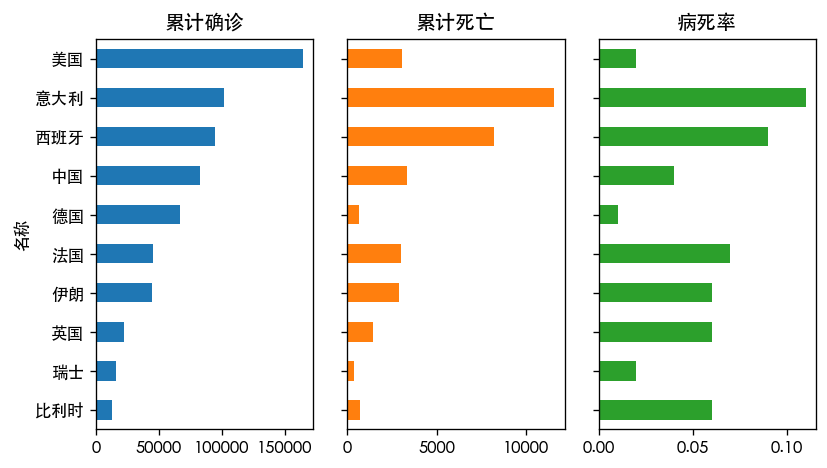

In [21]:
# 绘制条形图
world_top10.sort_values('累计确诊').plot.barh(subplots=True,layout=(1,3),sharex=False,
                                             figsize=(7,4),legend=False,sharey=True)

plt.tight_layout()   #调整子图间距
plt.show()

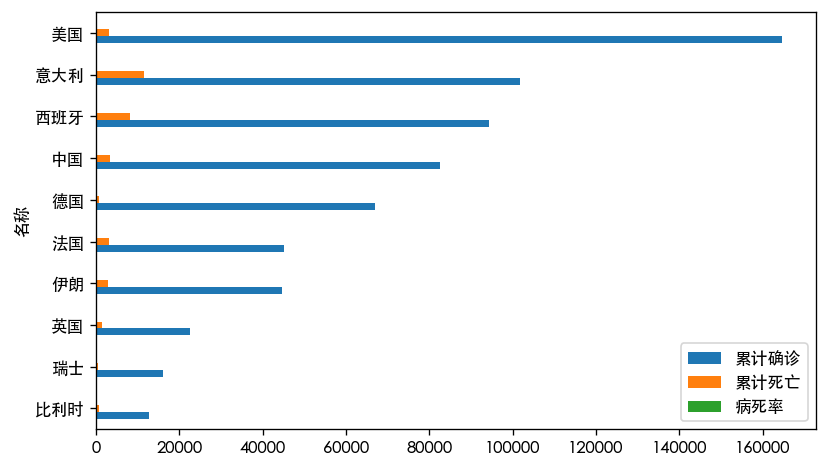

In [22]:
# 绘制条形图
world_top10.sort_values('累计确诊').plot.barh(figsize=(7,4),legend=True)

plt.tight_layout()   #调整子图间距
plt.show()

由图可知，目前美国累计确诊病例已远远高于其他国家，意大利、西班牙人数也相对较高。而在病死率的图表上意大利则位列第一，可见疫情的严重性，西班牙、法国、伊朗、英国、比利时病死率紧跟其后。然而，累计确诊人数最高的美国病死率却相对较低，其中一个原因就是美国的医疗资源丰富，下图是一张每十万人ICU病床数量的国家排名条形图：

<img src="http://cookdata.cn/media/note_images/ICU床位_1585795843094_5d14.jpg" width="500" height="500">

我们发现，美国每十万居民拥有将近35个ICU床位，排在世界第一，德国紧跟其后有近30个ICU床位，两国的医疗资源远远高于其他国家，这也是新冠肺炎疫病死率相对较低的原因之一。

## <a id=2.2></a> 2.2 全国各省实时数据探索性分析

下面让我们一起来分析国内的新冠肺炎疫情情况。全国各省实时数据的预处理工作与前面的流程基本一致，数据清洗之后我们将分别探索全国新增确诊top10地区，及全国现存确诊人数top10的地区。

In [23]:
# 读取数据
today_province = pd.read_csv("./input/today_province_2020_03_31.csv")

# 创建中文列名字典
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}

# 更改列名
today_province.rename(columns=name_dict,inplace=True)    # inplace参数是否在原对象基础上进行修改

today_province.head()

,编号,更新时间,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,420000,2020-03-31 08:26:38,湖北,67801,0,63153,3187,0,0,NaN,271,1,NaN,NaN
1,440000,2020-03-31 17:49:10,广东,1494,0,1356,8,0,10,NaN,5,0,NaN,NaN
2,410000,2020-03-31 08:30:02,河南,1276,0,1251,22,0,0,NaN,0,0,NaN,NaN
3,330000,2020-03-31 09:06:29,浙江,1257,0,1226,1,0,2,NaN,1,0,NaN,NaN
4,430000,2020-03-31 08:27:03,湖南,1018,0,1014,4,0,0,NaN,0,0,NaN,NaN


In [24]:
# 查看数据基本信息
today_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      34 non-null     int64  
 1   更新时间    34 non-null     object 
 2   名称      34 non-null     object 
 3   累计确诊    34 non-null     int64  
 4   累计疑似    34 non-null     int64  
 5   累计治愈    34 non-null     int64  
 6   累计死亡    34 non-null     int64  
 7   累计重症    34 non-null     int64  
 8   当日新增确诊  34 non-null     int64  
 9   当日新增疑似  3 non-null      float64
 10  当日新增治愈  34 non-null     int64  
 11  当日新增死亡  34 non-null     int64  
 12  当日新增重症  3 non-null      float64
 13  当日现存确诊  0 non-null      float64
dtypes: float64(3), int64(9), object(2)
memory usage: 3.8+ KB


使用`describe()`查看数据的统计信息：

In [25]:
# 查看数值型特征的统计量
today_province.describe()

,编号,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,34.000000,34.000000,34.0,34.000000,34.000000,34.0,34.000000,3.0,34.000000,34.000000,3.0,0.0
mean,422941.176471,2429.382353,0.0,2242.264706,97.470588,0.0,4.441176,0.0,8.823529,0.088235,0.0,NaN
std,195021.823359,11557.886325,0.0,10769.927341,545.923418,0.0,13.089879,0.0,46.386042,0.378806,0.0,NaN
min,110000.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,NaN
25%,312500.000000,138.250000,0.0,124.250000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,NaN
50%,425000.000000,321.500000,0.0,246.000000,3.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,NaN
75%,537500.000000,697.000000,0.0,615.750000,6.000000,0.0,2.750000,0.0,0.000000,0.000000,0.0,NaN
max,820000.000000,67801.000000,0.0,63153.000000,3187.000000,0.0,73.000000,0.0,271.000000,2.000000,0.0,NaN


我们发现，累计疑似、累计重症、当日新增疑似和当日新增重症的数据全部为0，因此我们便不予考虑。

In [26]:
# 计算各省当日现存确诊人数
today_province['当日现存确诊'] = today_province['累计确诊']-today_province['累计治愈']-today_province['累计死亡']

# 将各省名称设置为索引
today_province.set_index('名称',inplace=True)

today_province.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 湖北 to 西藏
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   编号      34 non-null     int64  
 1   更新时间    34 non-null     object 
 2   累计确诊    34 non-null     int64  
 3   累计疑似    34 non-null     int64  
 4   累计治愈    34 non-null     int64  
 5   累计死亡    34 non-null     int64  
 6   累计重症    34 non-null     int64  
 7   当日新增确诊  34 non-null     int64  
 8   当日新增疑似  3 non-null      float64
 9   当日新增治愈  34 non-null     int64  
 10  当日新增死亡  34 non-null     int64  
 11  当日新增重症  3 non-null      float64
 12  当日现存确诊  34 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 3.7+ KB


**全国新增确诊top10地区**

目前，我国疫情已得到很好的控制，我们现在更为关注的是新增确诊病例的地区。

In [27]:
# 查看全国新增确诊top10的地区
new_top6 = today_province['当日新增确诊'].sort_values(ascending=False)[:10]

new_top6

名称
香港     73
台湾     24
上海     11
广东     10
内蒙古    10
天津      8
福建      3
辽宁      3
北京      3
浙江      2
Name: 当日新增确诊, dtype: int64

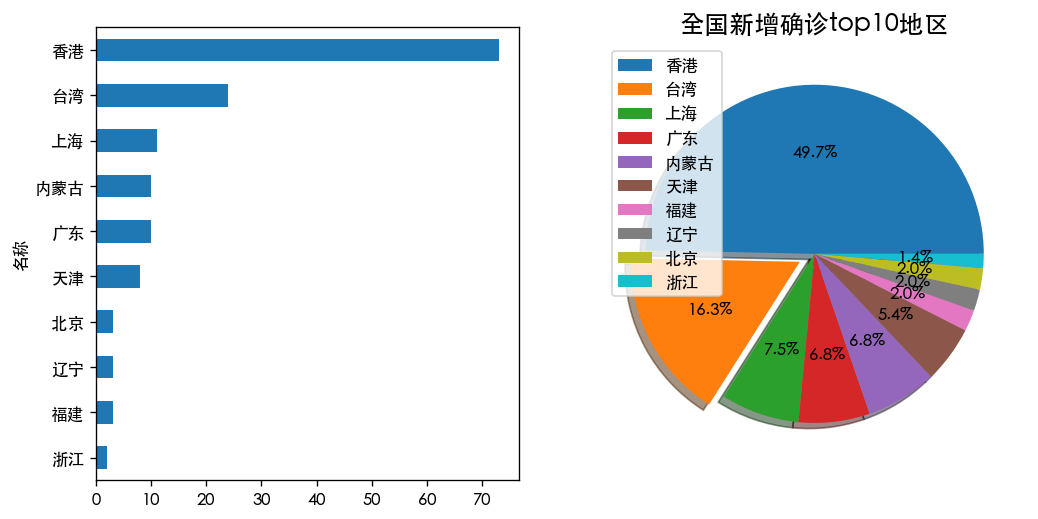

In [28]:
# 绘制条形图和饼图
fig,ax = plt.subplots(1,2,figsize=(10,5))

new_top6.sort_values(ascending=True).plot.barh(fontsize=10,ax=ax[0])
explode = (0,0.1,0,0,0,0,0,0,0,0)
new_top6.plot.pie(explode=explode,shadow=True,labels=None,\
                  legend=True,autopct='%.1f%%',fontsize=10,ax=ax[1])

plt.ylabel('')
plt.title('全国新增确诊top10地区',size=15)
plt.show()

从图中可知，香港、台湾新增确诊人数最多，且在新增确诊前十名的地区，香港占比将近一半。

**全国现存确诊人数top10的地区**

接下来我们查看一下全国现存确诊病例前十名的地区有哪些。

In [31]:
# 查看全国现存确诊人数top10的省市
store_top10 = today_province['当日现存确诊'].sort_values(ascending=False)[:10]

store_top10

名称
湖北     1461
香港      582
台湾      278
上海      163
北京      154
广东      130
福建       47
天津       38
内蒙古      32
浙江       30
Name: 当日现存确诊, dtype: int64

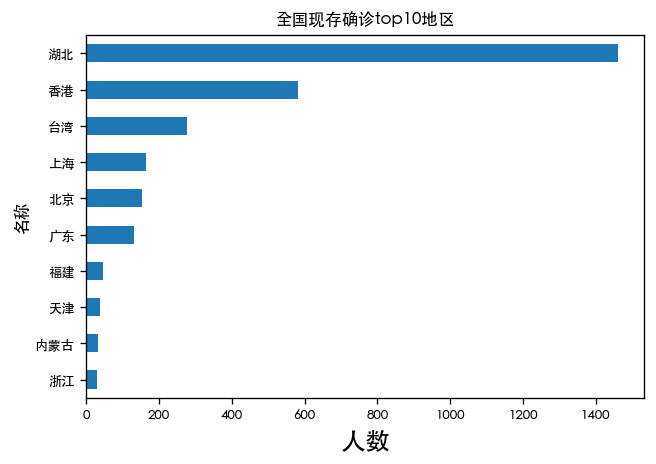

In [32]:
# 绘制条形图

store_top10.sort_values(ascending=True).plot.barh(fontsize=8)

plt.title('全国现存确诊top10地区',size=10)
plt.xlabel('人数', size=15)
plt.show()

虽然湖北现存确诊人数仍位居第一，但新增确诊病例比较少。

# <a id=3></a>3. 历史数据探索性分析

## <a id=3.1></a> 3.1 全国历史数据探索性分析

全国历史数据是时间序列的数据类型，在数据清洗的时候需要对时间进行处理。本部分的最后我们将绘制全国历史数据的折线图，并着重分析全国新增确诊人数的变化趋势。

In [33]:
# 读取数据
alltime_china = pd.read_csv("./input/alltime_China_2020_03_31.csv")

# 创建中文列名字典
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}

# 更改列名
alltime_china.rename(columns=name_dict,inplace=True)

alltime_china.head()

,日期,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,2020-01-20,NaN,291,54,25,6,0,291,27,25,6,0,NaN
1,2020-01-21,NaN,440,37,25,9,102,149,26,0,3,0,NaN
2,2020-01-22,NaN,571,393,28,17,95,131,257,3,8,0,NaN
3,2020-01-23,NaN,830,1072,34,25,177,259,680,6,8,0,NaN
4,2020-01-24,NaN,1287,1965,38,41,237,457,1118,4,16,0,NaN


In [34]:
alltime_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      71 non-null     object 
 1   更新时间    0 non-null      float64
 2   累计确诊    71 non-null     int64  
 3   累计疑似    71 non-null     int64  
 4   累计治愈    71 non-null     int64  
 5   累计死亡    71 non-null     int64  
 6   累计重症    71 non-null     int64  
 7   当日新增确诊  71 non-null     int64  
 8   当日新增疑似  71 non-null     int64  
 9   当日新增治愈  71 non-null     int64  
 10  当日新增死亡  71 non-null     int64  
 11  当日新增重症  71 non-null     int64  
 12  当日现存确诊  0 non-null      float64
dtypes: float64(2), int64(10), object(1)
memory usage: 7.3+ KB


In [35]:
# 查看数据的统计信息
alltime_china.describe()

,更新时间,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,0.0,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0,0.0
mean,NaN,58272.267606,6094.830986,33245.281690,2025.056338,4796.183099,1148.140845,1378.154930,1071.154930,46.549296,0.0,NaN
std,NaN,30572.980946,8497.722887,29864.644742,1264.722329,3724.337603,1985.171351,1749.404925,930.775616,43.866612,0.0,NaN
min,NaN,291.000000,37.000000,25.000000,6.000000,0.000000,11.000000,17.000000,0.000000,1.000000,0.0,NaN
25%,NaN,32853.500000,178.500000,1795.000000,679.000000,1550.000000,46.500000,42.500000,302.000000,9.500000,0.0,NaN
50%,NaN,77658.000000,1418.000000,27323.000000,2663.000000,4020.000000,397.000000,439.000000,819.000000,30.000000,0.0,NaN
75%,NaN,80818.500000,8598.500000,64826.000000,3182.500000,7514.500000,1934.500000,2363.500000,1679.500000,73.000000,0.0,NaN
max,NaN,81518.000000,28942.000000,76052.000000,3305.000000,11977.000000,14108.000000,5328.000000,3622.000000,150.000000,0.0,NaN


In [36]:
# 缺失值处理

# 计算当日现存确诊人数
alltime_china['当日现存确诊'] = alltime_china['累计确诊']-alltime_china['累计治愈']-alltime_china['累计死亡']

# 删除更新时间一列
alltime_china.drop(['更新时间','当日新增重症'],axis=1,inplace=True)

alltime_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      71 non-null     object
 1   累计确诊    71 non-null     int64 
 2   累计疑似    71 non-null     int64 
 3   累计治愈    71 non-null     int64 
 4   累计死亡    71 non-null     int64 
 5   累计重症    71 non-null     int64 
 6   当日新增确诊  71 non-null     int64 
 7   当日新增疑似  71 non-null     int64 
 8   当日新增治愈  71 non-null     int64 
 9   当日新增死亡  71 non-null     int64 
 10  当日现存确诊  71 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 6.2+ KB


In [37]:
alltime_china = alltime_china.reset_index()

与实时数据相比，历史数据的日期一列是非常重要的。我们使用`pd.to_datetime()`将日期的数据类型设为`datetime`，并将其设置为行索引。

In [38]:
alltime_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   71 non-null     int64 
 1   日期      71 non-null     object
 2   累计确诊    71 non-null     int64 
 3   累计疑似    71 non-null     int64 
 4   累计治愈    71 non-null     int64 
 5   累计死亡    71 non-null     int64 
 6   累计重症    71 non-null     int64 
 7   当日新增确诊  71 non-null     int64 
 8   当日新增疑似  71 non-null     int64 
 9   当日新增治愈  71 non-null     int64 
 10  当日新增死亡  71 non-null     int64 
 11  当日现存确诊  71 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 6.8+ KB


In [39]:
# 将日期改成datetime格式
# alltime_china['日期'] = pd.to_datetime(alltime_china['日期'])

# 设置日期为索引
alltime_china.set_index('日期',inplace=True)     # 也可使用pd.read_csv("./input/alltime_China_2020_03_27.csv",parse_dates=['date'],index_col='date')

alltime_china.index

Index(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
       '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
       '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
       '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
       '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23',
       '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
       '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
       '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',

设置为时期索引后，数据的选取将非常便利。

数据清洗之后，我们将绘制折线图查看新冠肺炎数据的变化趋势：

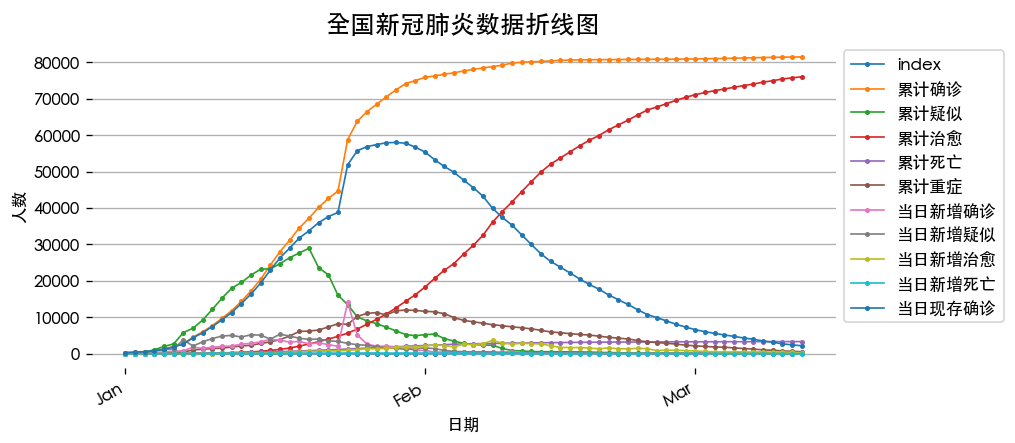

In [40]:
# 时间序列数据绘制折线图
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import datetime

fig, ax = plt.subplots(figsize=(8,4))

alltime_china.plot(marker='o',ms=2,lw=1,ax=ax)

ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式

fig.autofmt_xdate()    #自动调整日期倾斜

# 图例位置调整
plt.legend(bbox_to_anchor = [1,1])

plt.title('全国新冠肺炎数据折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.show()

由图可知，我国累计确诊人数在2月中旬已达到拐点，现存确诊人数也已从2月15日起逐步减少。同时，累计治愈人数稳步上升，且随现存确诊人数的下降而逐渐趋于平缓状态。由于新增确诊等字段数值相对较小，我们单独进行分析。

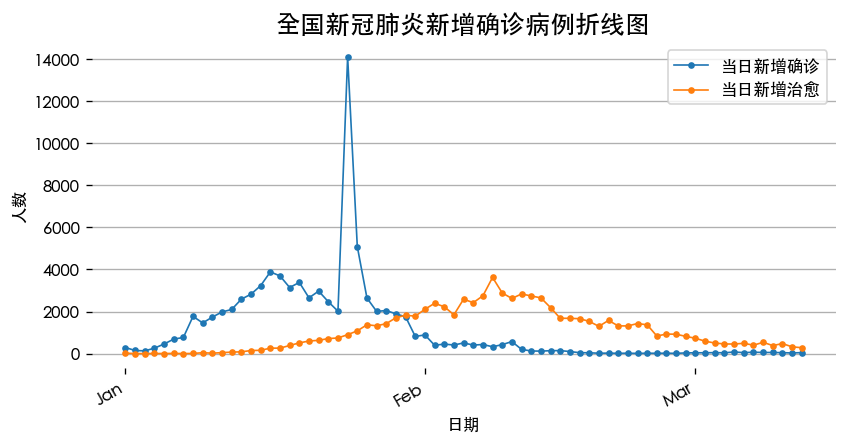

In [41]:
# 时间序列数据绘制折线图
fig, ax = plt.subplots(figsize=(8,4))

alltime_china[['当日新增确诊','当日新增治愈']].plot(ax=ax, style='-',lw=1,marker='o',ms=3)

ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式

fig.autofmt_xdate()    #自动调整日期倾斜

plt.title('全国新冠肺炎新增确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.show()

可以看到2月12日新增病例大幅上升，这是什么原因呢？如果你非常关注疫情，应该知道这是因为在当天国家卫健委调整了确诊的标准。此前，患者是否确诊，主要参考指标是核酸检测结果，还需要结合CT影像，咳嗽等症状来综合判断。随着疫情防控深入，临床数据的不断累积，有个新情况逐渐凸显出来——由于核酸检测的时间较慢，一些患者无法确诊收治，但是病症的临床表现又高度疑似新冠肺炎。如果不改变认定标准，这部分患者就难以得到有效救助，对整个疫情防控也造成负面影响。这次主要变化，就是将临床诊断纳入确诊范围。

## <a id=3.2></a> 3.2 世界各国历史数据探索性分析

最后让我们一起来分析一下世界各国历史数据，由于数据表中每个国家含有多条数据，我们需要借助GroupBy技术对数据进行分组，并通过层次化索引操作选取多个国家的累计确诊和新增确诊数据，来查看各国疫情变化趋势。

In [42]:
# 读取数据
alltime_world = pd.read_csv("./input/alltime_world_2020_03_31.csv")

# 创建中文列名字典
name_dict = {'date':'日期','name':'名称','id':'编号','lastUpdateTime':'更新时间',
             'today_confirm':'当日新增确诊','today_suspect':'当日新增疑似',
             'today_heal':'当日新增治愈','today_dead':'当日新增死亡',
             'today_severe':'当日新增重症','today_storeConfirm':'当日现存确诊',
             'total_confirm':'累计确诊','total_suspect':'累计疑似',
             'total_heal':'累计治愈','total_dead':'累计死亡','total_severe':'累计重症'}

# 更改列名
alltime_world.rename(columns=name_dict,inplace=True)

alltime_world.head()

,日期,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,名称
0,2020-03-03,1,0,0,0,0,1,0.0,0,0,NaN,NaN,突尼斯
1,2020-03-08,2,0,0,0,0,1,0.0,0,0,0.0,NaN,突尼斯
2,2020-03-09,5,0,0,0,0,3,0.0,0,0,0.0,NaN,突尼斯
3,2020-03-11,7,0,0,0,0,2,0.0,0,0,0.0,NaN,突尼斯
4,2020-03-12,13,0,0,0,0,6,0.0,0,0,0.0,NaN,突尼斯


In [43]:
# 查看数据基本信息
alltime_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日期      3048 non-null   object 
 1   累计确诊    3048 non-null   int64  
 2   累计疑似    3048 non-null   int64  
 3   累计治愈    3048 non-null   int64  
 4   累计死亡    3048 non-null   int64  
 5   累计重症    3048 non-null   int64  
 6   当日新增确诊  3048 non-null   int64  
 7   当日新增疑似  2912 non-null   float64
 8   当日新增治愈  3048 non-null   int64  
 9   当日新增死亡  3048 non-null   int64  
 10  当日新增重症  2512 non-null   float64
 11  当日现存确诊  0 non-null      float64
 12  名称      3048 non-null   object 
dtypes: float64(3), int64(8), object(2)
memory usage: 309.7+ KB


In [44]:
alltime_world.describe()

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
count,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,3048.000000,2912.000000,3048.000000,3048.000000,2512.000000,0.0
mean,3275.215879,89.309055,1006.174541,132.135499,35.017388,262.135499,15.595467,55.206693,12.646982,-2.882564,NaN
std,13482.084538,1253.684029,6980.113868,698.118983,403.228076,1290.621505,201.004634,306.368872,73.263761,27.524887,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-464.000000,NaN
25%,16.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,90.000000,0.000000,1.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,554.500000,0.000000,16.000000,6.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN
max,164603.000000,28942.000000,76237.000000,11591.000000,7365.000000,26154.000000,4008.000000,5352.000000,1386.000000,0.000000,NaN


数据预处理操作与前面的方法基本一致：

In [45]:
# 将日期一列数据类型变为datetime
alltime_world['日期'] = pd.to_datetime(alltime_world['日期'])

# 计算当日现存确诊
alltime_world['当日现存确诊'] = alltime_world['累计确诊']-alltime_world['累计治愈']-alltime_world['累计死亡']

alltime_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      3048 non-null   datetime64[ns]
 1   累计确诊    3048 non-null   int64         
 2   累计疑似    3048 non-null   int64         
 3   累计治愈    3048 non-null   int64         
 4   累计死亡    3048 non-null   int64         
 5   累计重症    3048 non-null   int64         
 6   当日新增确诊  3048 non-null   int64         
 7   当日新增疑似  2912 non-null   float64       
 8   当日新增治愈  3048 non-null   int64         
 9   当日新增死亡  3048 non-null   int64         
 10  当日新增重症  2512 non-null   float64       
 11  当日现存确诊  3048 non-null   int64         
 12  名称      3048 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 309.7+ KB


数据表中总共有哪些国家呢？我们可以使用`unique()`查看数据中的唯一值：

In [46]:
alltime_world['名称'].nunique()

198

In [47]:
# 查看唯一值,可使用len()查看个数
alltime_world['名称'].unique()

array(['突尼斯', '塞尔维亚', '中国', '日本', '泰国', '新加坡', '韩国', '澳大利亚', '德国', '美国',
       '马来西亚', '越南', '圣巴泰勒米', '肯尼亚', '伊朗', '以色列', '黎巴嫩', '克罗地亚', '奥地利',
       '瑞士', '希腊', '毛里求斯', '爱沙尼亚', '北马其顿', '白俄罗斯', '立陶宛', '阿塞拜疆',
       '美属维尔京群岛', '蒙古', '乌克兰', '波兰', '波斯尼亚', '波黑', '蒙特塞拉特', '南非', '马耳他',
       '摩尔多瓦', '保加利亚', '孟加拉国', '阿尔巴尼亚', '巴勒斯坦', '阿富汗', '沙特阿拉伯', '新西兰',
       '泽西岛', '叙利亚', '巴拿马', '古巴', '尼日利亚', '摩洛哥', '塞内加尔', '老挝', '巴哈马',
       '马约特岛', '萨尔多瓦', '斯洛文尼亚', '卢森堡', '爱尔兰', '厄瓜多尔', '捷克', '匈牙利',
       '法属圭亚那', '多哥共和国', '哥斯达黎加', '文莱', '荷兰', '巴西', '洪都拉斯', '乌拉圭', '秘鲁',
       '智利', '格陵兰', '圣巴托洛谬岛', '马尔代夫', '委内瑞拉', '毛里塔尼亚', '纳米比亚', '法属留尼汪岛',
       '波多黎各', '加纳', '赤道几内亚', '几内亚', '卢旺达', '格林纳达', '斯威士兰', '坦桑尼亚', '贝宁',
       '刚果（金）', '中非共和国', '利比里亚', '索马里', '乍得', '赞比亚', '巴巴多斯', '马里', '阿根廷',
       '法属波利尼西亚', '巴林', '莫桑比克', '喀麦隆', '乌干达', '厄立特里亚', '刚果（布）', '津巴布韦',
       '丹麦', '阿鲁巴', '斐济', '伯利兹', '缅甸', '塞浦路斯', '关岛', '科索沃', '吉尔吉斯斯坦',
       '博茨瓦纳', '尼日尔', '苏里南', '佛得角', '萨尔瓦多', '圭亚那', '尼加拉瓜', '冈比亚', '东帝汶',

同时我们还想了解随着时间的变化，每天有多少国家出现新冠肺炎疫情，`value_counts()`函数可帮助我们查看每一天记录了多少数据。

In [48]:
# 统计每天有多少国家出现疫情
alltime_world['日期'].value_counts().head(20)

2020-03-26    157
2020-03-27    130
2020-03-22    129
2020-03-25    125
2020-03-28    120
2020-03-24    118
2020-03-23    116
2020-03-14    113
2020-03-29    110
2020-03-19    109
2020-03-20    106
2020-03-13    105
2020-03-15    102
2020-03-30     97
2020-03-21     96
2020-03-16     94
2020-03-18     94
2020-03-17     86
2020-03-10     73
2020-03-11     71
Name: 日期, dtype: int64

数据中显示，3月26日这天出现疫情的国家数量已多达157个国家。

In [49]:
# 设置日期索引
alltime_world.set_index('日期',inplace=True)

# 3月31日数据统计不完全，我们将其删除
alltime_world = alltime_world.loc[:'2020-03-31']

**选取多国数据**  

接下来，我们想提取中国、日本、韩国、美国、意大利、英国、西班牙和德国的数据，探索这八个国家的累计确诊和新增确诊病例的变化趋势。我们将使用GroupBy技术和层次化索引操作。GroupBy技术是对数据进行分组计算并将各组计算结果合并的一项技术，包括如下三个过程：

<img src='http://cookdata.cn/media/note_images/groupby技术_1585496694168_5d14.jpg' style='max-width:40%;'>

想要提取多个国家的数据，就需要把国家一列也设置为索引，我们可以使用`groupby()`函数根据日期和名称两列进行分组，将数据转为层次化索引。

In [52]:
# groupby创建层次化索引
data = alltime_world.groupby(['日期','名称']).mean()

data.head()

,,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
日期,名称,,,,,,,,,,,
2020-01-20,韩国,1,0,0,0,0,1,0.0,0,0,NaN,1
2020-01-21,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-22,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-23,韩国,1,0,0,0,0,0,0.0,0,0,NaN,1
2020-01-24,韩国,2,0,0,0,0,1,0.0,0,0,NaN,2


想要提取部分数据，同样可以使用`.loc`方法，需先通过`.loc(axis= )`指定对行索引还是对列索引进行操作。比如，我们想提取中国、韩国、美国、意大利、英国、西班牙、德国的数据：

In [54]:
# 提取部分数据
data_part = data.loc(axis=0)[:,['中国','日本','韩国','美国','意大利','英国','西班牙','德国']]

data_part.tail()

,,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
日期,名称,,,,,,,,,,,
2020-03-26,德国,43938,0,5673,267,0,6615,0.0,2126,61,0.0,37998
2020-03-27,德国,50871,0,6658,351,0,6933,0.0,985,84,0.0,43862
2020-03-28,德国,53340,0,6658,399,0,2469,0.0,0,48,0.0,46283
2020-03-29,德国,62535,0,8481,433,0,9195,0.0,1823,34,0.0,53621
2020-03-30,德国,66885,0,13500,645,0,4350,0.0,5019,212,0.0,52740


此时，多级索引已设置成功。如果我们想将其还原则可使用`reset_index()`函数。

In [55]:
# 将层级索引还原
data_part.reset_index('名称',inplace=True)

data_part.head()

,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
日期,,,,,,,,,,,,
2020-02-05,中国,24433,23260,962,493,0,24433,3971.0,962,493,NaN,22978
2020-02-06,中国,31161,26359,1540,637,0,6728,3230.0,578,144,NaN,28984
2020-02-07,中国,34598,27657,2052,723,0,3437,0.0,512,86,NaN,31823
2020-02-08,中国,37162,28942,2651,812,0,2564,3916.0,599,89,NaN,33699
2020-02-09,中国,40224,23589,3282,909,0,3062,4008.0,631,97,NaN,36033


**绘制多个国家的累计确诊人数折线图**

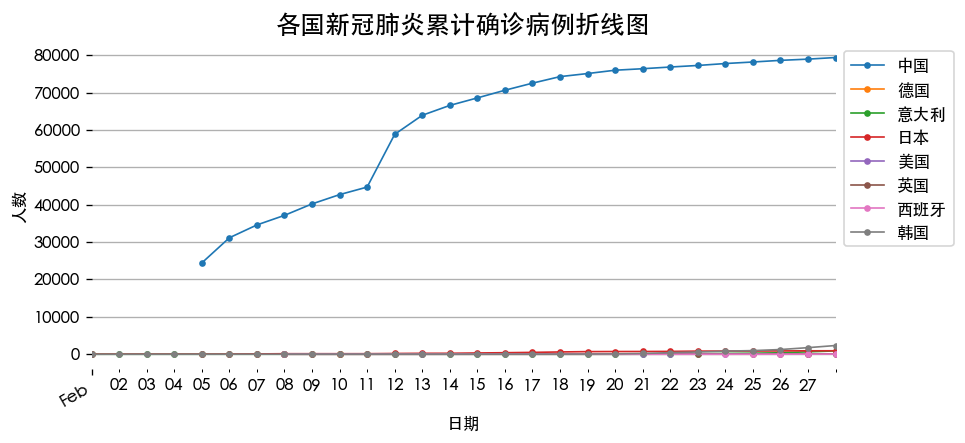

In [56]:
# 绘制多个国家的累计确诊人数折线图
fig, ax = plt.subplots(figsize=(8,4))

data_part.loc['2020-02':'2020-02-28'].groupby('名称')['累计确诊'].plot(legend=True,marker='o',ms=3,lw=1)

ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式

fig.autofmt_xdate()    #自动调整日期倾斜

plt.title('各国新冠肺炎累计确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.legend(bbox_to_anchor = [1,1])
plt.show()

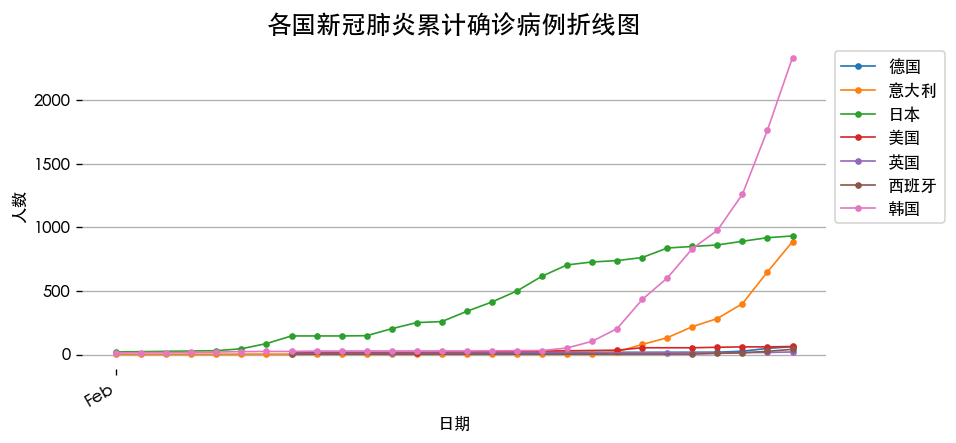

In [57]:
# 绘制多个国家的累计确诊人数折线图
fig, ax = plt.subplots(figsize=(8,4))

data_part[data_part['名称']!='中国'].loc['2020-02':'2020-02-28'].groupby('名称')['累计确诊'].plot(legend=True,marker='o',ms=3,lw=1)

ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式

fig.autofmt_xdate()    #自动调整日期倾斜

plt.title('各国新冠肺炎累计确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.legend(bbox_to_anchor = [1,1])
plt.show()

  最后，让我们一起来观察一下各国新增确诊人数的变化情况，这里我们只查看3月份的最新数据。

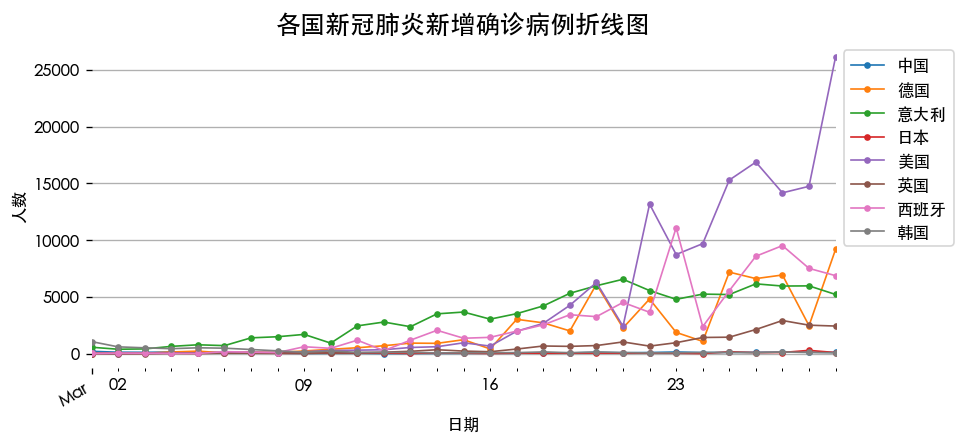

In [58]:
# 绘制各国新增确诊人数折线图
fig, ax = plt.subplots(figsize=(8,4))

data_part.loc['2020-03':'2020-03-29'].groupby('名称')['当日新增确诊'].plot(legend=True,marker='o',ms=3,lw=1)

ax.xaxis.set_major_locator(dates.MonthLocator())    #设置间距
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))    #设置日期格式

fig.autofmt_xdate()    #自动调整日期倾斜

plt.title('各国新冠肺炎新增确诊病例折线图',size=15)
plt.ylabel('人数')
plt.grid(axis='y')
plt.box(False)
plt.legend(bbox_to_anchor = [1,1])
plt.show()

各国新增确诊人数波动较大，但总体趋势呈上升状态。在3月下旬，美国和西班牙首次单日新增确诊人数破万，而最新数据显示美国单日新增已突破25000例。

在前面两张图里，我们发现日本由于数据较小，很难观察疫情的变化趋势。这里我们单独选取了日本新冠肺炎的累计确诊和当日新增确诊两列数据进行绘制：

In [59]:
alltime_world[alltime_world['名称']=='日本']

,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊,名称
日期,,,,,,,,,,,,
2020-01-28,4,0,0,0,0,4,0.0,0,0,NaN,4,日本
2020-01-30,6,0,0,0,0,2,0.0,0,0,NaN,6,日本
2020-01-31,15,0,0,0,0,9,0.0,0,0,NaN,15,日本
2020-02-01,20,0,0,0,0,5,0.0,0,0,NaN,20,日本
2020-02-05,30,0,0,0,0,10,0.0,0,0,NaN,30,日本
2020-02-06,45,0,0,0,0,15,0.0,0,0,NaN,45,日本
2020-02-07,86,0,0,0,0,41,0.0,0,0,NaN,86,日本
2020-02-08,146,0,1,0,0,60,0.0,1,0,NaN,145,日本
2020-02-09,146,0,1,0,0,0,0.0,0,0,NaN,145,日本


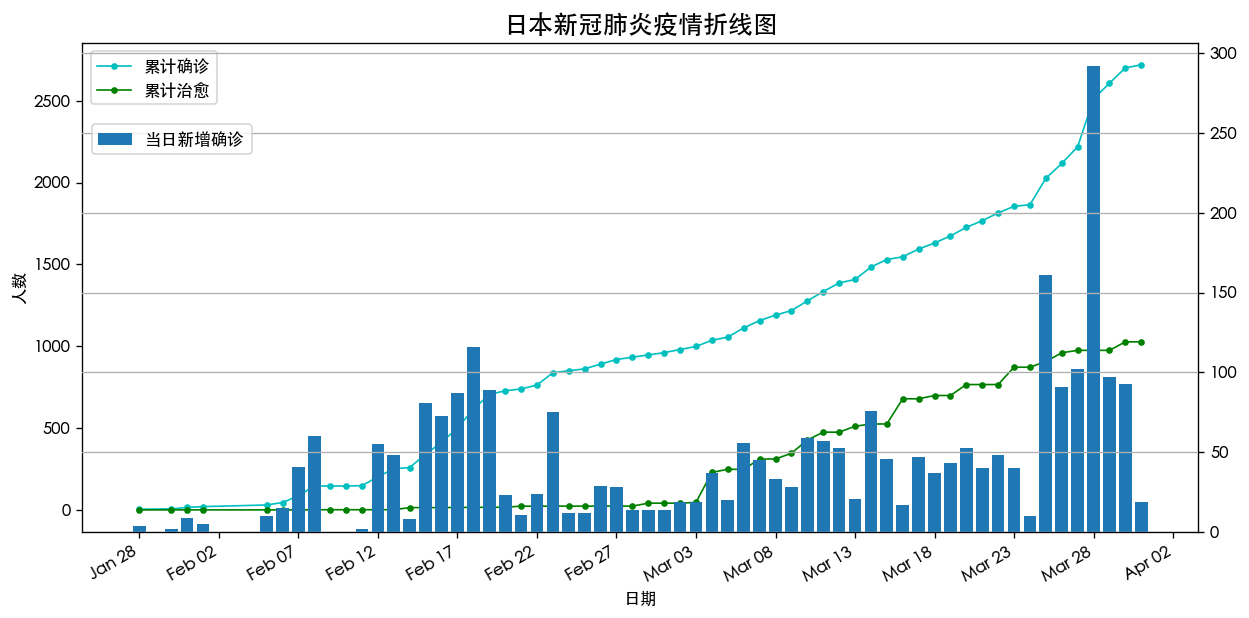

In [60]:
japan = alltime_world[alltime_world['名称']=='日本']

fig, ax = plt.subplots(figsize=(12,6))

japan['累计确诊'].plot(ax=ax, fontsize=10, style='-',lw=1,color='c',marker='o',ms=3,legend=True)
ax.set_ylabel('人数', fontsize=10)

japan['累计治愈'].plot(ax=ax, fontsize=10, style='-',lw=1,color='g',marker='o',ms=3,legend=True)
ax.set_ylabel('人数', fontsize=10)

ax1 = ax.twinx()
ax1.bar(japan.index, japan['当日新增确诊'])
ax1.xaxis.set_major_locator(dates.DayLocator(interval = 5))
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))
ax1.legend(['当日新增确诊'],loc='upper left',bbox_to_anchor=(0.001, 0.85))
plt.grid(axis='y')
plt.box(False)
plt.title('日本新冠肺炎疫情折线图',size=15)

plt.show()

我们发现日本前期新增确诊人数的变化几乎没有太大增幅，但在3月25日起，日本的新增确诊人数明显增大，同时累计确诊折线斜率也随之增加。

# <a id=4></a>4. 总结

本案例使用kaggle平台数据，进行新冠肺炎疫情数据的探索性分析。其中数据预处理主要包括特征列重命名、缺失值处理、查看重复值、数据类型转换等操作。此外，我们还使用了Pandas进行数据可视化，通过图表的绘制探索数据的内涵。同时，我们介绍了时间序列数据的处理方法、如何使用Groupby技术进行数据分组的操作方法。